In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
sub=pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [3]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
train.columns = [col.replace(' ', '_') for col in train.columns]
test.columns = [col.replace(' ', '_') for col in test.columns]
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working_Professional_or_Student', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts_?', 'Work/Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

In [5]:
print(train.dtypes,"\n\n",test.dtypes)

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working_Professional_or_Student           object
Profession                                object
Academic_Pressure                        float64
Work_Pressure                            float64
CGPA                                     float64
Study_Satisfaction                       float64
Job_Satisfaction                         float64
Sleep_Duration                            object
Dietary_Habits                            object
Degree                                    object
Have_you_ever_had_suicidal_thoughts_?     object
Work/Study_Hours                         float64
Financial_Stress                         float64
Family_History_of_Mental_Illness          object
Depression                                 int64
dtype: object 

 id 

In [6]:
train['Sleep_Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [7]:
sleep={
        "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5,
        '1-2 hours':1.5,
        '6-8 hours':7,
        '4-6 hours':5,
        '6-7 hours':6.5,
        '10-11 hours':10.5,
        '8-9 hours':8.5,
        '9-11 hours':10,
        '2-3 hours':2.5,
        '3-4 hours':3.5,
        'Moderate':6,
        '4-5 hours':4.5,
        '9-6 hours':7.5,
        '1-3 hours':2,
        '1-6 hours':4,
        '8 hours':8,
        '10-6 hours':8,
        'Unhealthy':3,
        'Work_Study_Hours':6,
        '3-6 hours':3.5,
        '9-5':7,
        '9-5 hours':7,
}

train['Sleep_Duration'] = train['Sleep_Duration'].map(sleep)
test['Sleep_Duration'] = test['Sleep_Duration'].map(sleep)

In [8]:
sleep_med=train['Sleep_Duration'].median()
train.fillna({'Sleep_Duration':sleep_med}, inplace=True)
test.fillna({'Sleep_Duration':sleep_med}, inplace=True)

In [9]:
print('Gender:',train['Gender'].unique())
print('Thoughts:',train['Have_you_ever_had_suicidal_thoughts_?'].unique())
print('Working:',train['Working_Professional_or_Student'].unique())
print('History:',train['Family_History_of_Mental_Illness'].unique())

Gender: ['Female' 'Male']
Thoughts: ['No' 'Yes']
Working: ['Working Professional' 'Student']
History: ['No' 'Yes']


In [10]:
gender={
    'Male':0,
    'Female':1,
}

work={
    'Working Professional':1,
    'Student':0,
}

Thoughts={
    'No':0,
    'Yes':1,
}

History={
    'No':0,
    'Yes':1,
}

train['Working_Professional_or_Student'] = train['Working_Professional_or_Student'].map(work)
test['Working_Professional_or_Student'] = test['Working_Professional_or_Student'].map(work)

train['Gender'] = train['Gender'].map(gender)
test['Gender'] = test['Gender'].map(gender)

train['Have_you_ever_had_suicidal_thoughts_?'] = train['Have_you_ever_had_suicidal_thoughts_?'].map(Thoughts)
test['Have_you_ever_had_suicidal_thoughts_?'] = test['Have_you_ever_had_suicidal_thoughts_?'].map(Thoughts)

train['Family_History_of_Mental_Illness'] = train['Family_History_of_Mental_Illness'].map(History)
test['Family_History_of_Mental_Illness'] = test['Family_History_of_Mental_Illness'].map(History)

print('Gender:',train['Gender'].unique(),'Working:',train['Working_Professional_or_Student'].unique(),'Thoughts:',train['Have_you_ever_had_suicidal_thoughts_?'].unique(),'History:',train['Family_History_of_Mental_Illness'].unique())

Gender: [1 0] Working: [1 0] Thoughts: [0 1] History: [0 1]


In [11]:
train['Work_Hours'] = train.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 1
    else 0,
    axis=1
)

train['Study_Hours'] = train.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 0
    else 0,
    axis=1
)


test['Work_Hours'] = test.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 1
    else 0,
    axis=1
)

test['Study_Hours'] = test.apply(
    lambda row: np.nan if pd.isna(row['Work/Study_Hours']) 
    else row['Work/Study_Hours'] if row['Working_Professional_or_Student'] == 0
    else 0,
    axis=1
)


train.drop(['Work/Study_Hours'], axis=1, inplace=True)
test.drop(['Work/Study_Hours'], axis=1, inplace=True)

In [12]:
train['Academic_Pressure'] = train.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 1
    else (np.nan if pd.isna(row['Academic_Pressure']) else row['Academic_Pressure']),
    axis=1
)

test['Academic_Pressure'] = test.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 1
    else (np.nan if pd.isna(row['Academic_Pressure']) else row['Academic_Pressure']),
    axis=1
)


train['Work_Pressure'] = train.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 0
    else (np.nan if pd.isna(row['Work_Pressure']) else row['Work_Pressure']),
    axis=1
)

test['Work_Pressure'] = test.apply(
    lambda row: 0 if row['Working_Professional_or_Student'] == 0
    else (np.nan if pd.isna(row['Work_Pressure']) else row['Work_Pressure']),
    axis=1
)

In [13]:
train['Dietary_Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [14]:
diet={
    'More Healty':0,
    'Healthy':1,
    'Less than Healthy':2,
    'Less Healthy':2,
    'Moderate':3,
    'Unhealthy':4,   
    'No Healthy':4,
}

train['Dietary_Habits'] = train['Dietary_Habits'].map(diet)
test['Dietary_Habits'] = test['Dietary_Habits'].map(diet)

train['Dietary_Habits'].unique()

array([ 1.,  4.,  3., nan,  2.])

In [15]:
train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [16]:
degree = {
    "BCom": "B.Com", "B.Com": "B.Com", "B.Comm": "B.Com",
    "B.Tech": "B.Tech", "BTech": "B.Tech", "B.T": "B.Tech",
    "BSc": "B.Sc", "B.Sc": "B.Sc", "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch", "B.Arch": "B.Arch",
    "BA": "B.A", "B.A": "B.A",
    "BBA": "BBA", "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed", "B.Ed": "B.Ed",
    "BPharm": "B.Pharm", "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB", "LL B": "LLB", "LL BA": "LLB", "LL.Com": "LLB", "LLCom": "LLB",
    "MCom": "M.Com", "M.Com": "M.Com",
    "M.Tech": "M.Tech", "MTech": "M.Tech", "M.T": "M.Tech",
    "MSc": "M.Sc", "M.Sc": "M.Sc", "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed", "M.Ed": "M.Ed",
    "MArch": "M.Arch", "M.Arch": "M.Arch",
    "MPharm": "M.Pharm", "M.Pharm": "M.Pharm",
    "MA": "MA", "M.A": "MA",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12",
    "Class 11": "Class 11", "11th": "Class 11"
}

train['Degree'] = train['Degree'].map(degree)
test['Degree'] = test['Degree'].map(degree)

train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'B.Sc', 'ME',
       'B.Arch', 'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', nan,
       'B.A', 'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'M.Sc', 'B.Tech',
       'LLM', 'MBBS', 'M.Pharm', 'MPA', 'Class 11', 'M.Arch'],
      dtype=object)

In [17]:
print(train.isnull().sum(),"\n\n",test.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working_Professional_or_Student               0
Profession                                36630
Academic_Pressure                             9
Work_Pressure                                20
CGPA                                     112802
Study_Satisfaction                       112803
Job_Satisfaction                          27910
Sleep_Duration                                0
Dietary_Habits                               24
Degree                                     3379
Have_you_ever_had_suicidal_thoughts_?         0
Financial_Stress                              4
Family_History_of_Mental_Illness              0
Depression                                    0
Work_Hours                                    0
Study_Hours                             

In [18]:
nanlist=['Work_Hours','Study_Hours','Profession','Academic_Pressure','Work_Pressure','CGPA','Study_Satisfaction','Job_Satisfaction','Dietary_Habits','Degree','Financial_Stress']

In [19]:
for col in nanlist:
    napercent=(train[col].isna().sum()/train[col].shape[0])*100
    print(f"{col} is %{napercent:.2f} null")

Work_Hours is %0.00 null
Study_Hours is %0.00 null
Profession is %26.03 null
Academic_Pressure is %0.01 null
Work_Pressure is %0.01 null
CGPA is %80.17 null
Study_Satisfaction is %80.17 null
Job_Satisfaction is %19.84 null
Dietary_Habits is %0.02 null
Degree is %2.40 null
Financial_Stress is %0.00 null


In [20]:
train['Work_Stress'] = train.apply(
    lambda row:(row['Financial_Stress'] + row['Work_Pressure'] - row['Job_Satisfaction'])if row['Working_Professional_or_Student'] == 1 
    else 0,
    axis=1
)

train['Academic_Stress'] = train.apply(
    lambda row:(row['Financial_Stress'] + row['Academic_Pressure'] - row['Study_Satisfaction'])if row['Working_Professional_or_Student'] == 0 
    else 0,
    axis=1
)

test['Work_Stress'] = test.apply(
    lambda row:(row['Financial_Stress'] + row['Work_Pressure'] - row['Job_Satisfaction'])if row['Working_Professional_or_Student'] == 1 
    else 0,
    axis=1
)

test['Academic_Stress'] = test.apply(
    lambda row:(row['Financial_Stress'] + row['Academic_Pressure'] - row['Study_Satisfaction'])if row['Working_Professional_or_Student'] == 0 
    else 0,
    axis=1
)

In [21]:
nanlist=['Work_Stress','Academic_Stress','Work_Hours','Study_Hours','Profession','Academic_Pressure','Work_Pressure','CGPA','Study_Satisfaction','Job_Satisfaction','Dietary_Habits','Degree','Financial_Stress']

In [22]:
for col in nanlist:
    print(f"{col}:",train[col].dtype)

Work_Stress: float64
Academic_Stress: float64
Work_Hours: float64
Study_Hours: float64
Profession: object
Academic_Pressure: float64
Work_Pressure: float64
CGPA: float64
Study_Satisfaction: float64
Job_Satisfaction: float64
Dietary_Habits: float64
Degree: object
Financial_Stress: float64


In [23]:
train.fillna({'Degree': 'Unknown', 'Profession': 'Unknown'}, inplace=True)
test.fillna({'Degree': 'Unknown', 'Profession': 'Unknown'}, inplace=True)

In [24]:
from sklearn.model_selection import StratifiedKFold
from category_encoders import TargetEncoder


n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


target_encoder = TargetEncoder(cols=['Profession', 'Degree'])


for train_index, val_index in kf.split(train, train['Depression']):
    train_fold = train.iloc[train_index]
    val_fold = train.iloc[val_index]
    

    train_fold_encoded = target_encoder.fit_transform(train_fold[['Profession', 'Degree']], train_fold['Depression'])
    val_fold_encoded = target_encoder.transform(val_fold[['Profession', 'Degree']])
    

    train.loc[val_index, ['Profession', 'Degree']] = val_fold_encoded

test_encoded = target_encoder.transform(test[['Profession', 'Degree']])
test[['Profession', 'Degree']] = test_encoded

In [25]:
mean_n = train.groupby('Name')['Depression'].mean()
train['Name'] = train['Name'].map(mean_n)
test['Name'] = test['Name'].map(mean_n)

mean_n = train.groupby('City')['Depression'].mean()
train['City'] = train['City'].map(mean_n)
test['City'] = test['City'].map(mean_n)

In [26]:
for col in nanlist:
    med=train[col].median()
    train.fillna({col:med}, inplace=True)
    test.fillna({col:med}, inplace=True)

print(train.isnull().sum(),"\n\n",test.isnull().sum())

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working_Professional_or_Student          0
Profession                               0
Academic_Pressure                        0
Work_Pressure                            0
CGPA                                     0
Study_Satisfaction                       0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Degree                                   0
Have_you_ever_had_suicidal_thoughts_?    0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Depression                               0
Work_Hours                               0
Study_Hours                              0
Work_Stress                              0
Academic_Stress                          0
dtype: int6

In [27]:
newnan=["Name","City"]

for col in newnan:
    med=train[col].median()
    test.fillna({col:med}, inplace=True)

test.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working_Professional_or_Student          0
Profession                               0
Academic_Pressure                        0
Work_Pressure                            0
CGPA                                     0
Study_Satisfaction                       0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Degree                                   0
Have_you_ever_had_suicidal_thoughts_?    0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Work_Hours                               0
Study_Hours                              0
Work_Stress                              0
Academic_Stress                          0
dtype: int64

In [28]:
train.head(10)

,id,Name,Gender,Age,City,Working_Professional_or_Student,Profession,Academic_Pressure,Work_Pressure,CGPA,...,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Financial_Stress,Family_History_of_Mental_Illness,Depression,Work_Hours,Study_Hours,Work_Stress,Academic_Stress
0,0,0.194621,1,49.0,0.192690,1,0.045139,0.0,5.0,7.77,...,1.0,0.168907,0,2.0,0,0,1.0,0.0,5.0,0.0
1,1,0.186916,0,26.0,0.142206,1,0.056034,0.0,4.0,7.77,...,4.0,0.153287,1,3.0,0,1,7.0,0.0,4.0,0.0
2,2,0.172603,0,33.0,0.159196,0,0.181708,5.0,0.0,8.97,...,1.0,0.181708,1,1.0,0,1,0.0,3.0,0.0,4.0
3,3,0.172603,0,22.0,0.131293,1,0.059611,0.0,5.0,7.77,...,3.0,0.115984,1,1.0,1,1,10.0,0.0,5.0,0.0
4,4,0.180361,1,30.0,0.125739,1,0.058729,0.0,1.0,7.77,...,4.0,0.126476,1,4.0,1,0,9.0,0.0,4.0,0.0
5,5,0.168377,1,59.0,0.217887,1,0.029126,0.0,2.0,7.77,...,1.0,0.143899,0,5.0,0,0,7.0,0.0,2.0,0.0
6,6,0.228446,0,47.0,0.242248,1,0.026960,0.0,5.0,7.77,...,3.0,0.120455,0,2.0,0,0,6.0,0.0,5.0,0.0
7,7,0.185930,0,38.0,0.158715,1,0.181708,0.0,3.0,7.77,...,4.0,0.181708,0,3.0,1,0,10.0,0.0,2.0,0.0
8,8,0.223493,1,24.0,0.175600,0,0.536063,2.0,0.0,5.90,...,3.0,0.154656,0,2.0,1,0,0.0,3.0,0.0,-1.0
9,9,0.165823,1,42.0,0.163234,1,0.042484,0.0,4.0,7.77,...,1.0,0.066110,1,2.0,1,0,7.0,0.0,5.0,0.0


In [29]:
id_col_tra= train['id']
train.drop(['id'],axis = 1,inplace = True)
id_col_test= test['id']
test.drop(['id'],axis = 1,inplace = True)

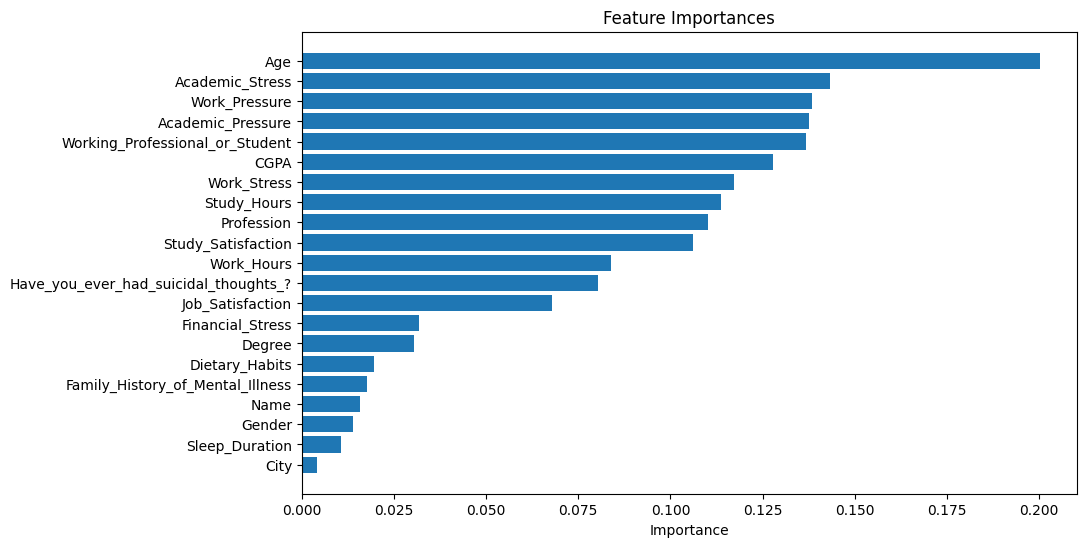

In [30]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train.drop('Depression', axis=1), train['Depression'])
mi_series = pd.Series(mi, index=train.drop('Depression', axis=1).columns)

feature_importance = pd.DataFrame({
    'Feature': train.drop('Depression', axis=1).columns,
    'Importance': mi_series
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

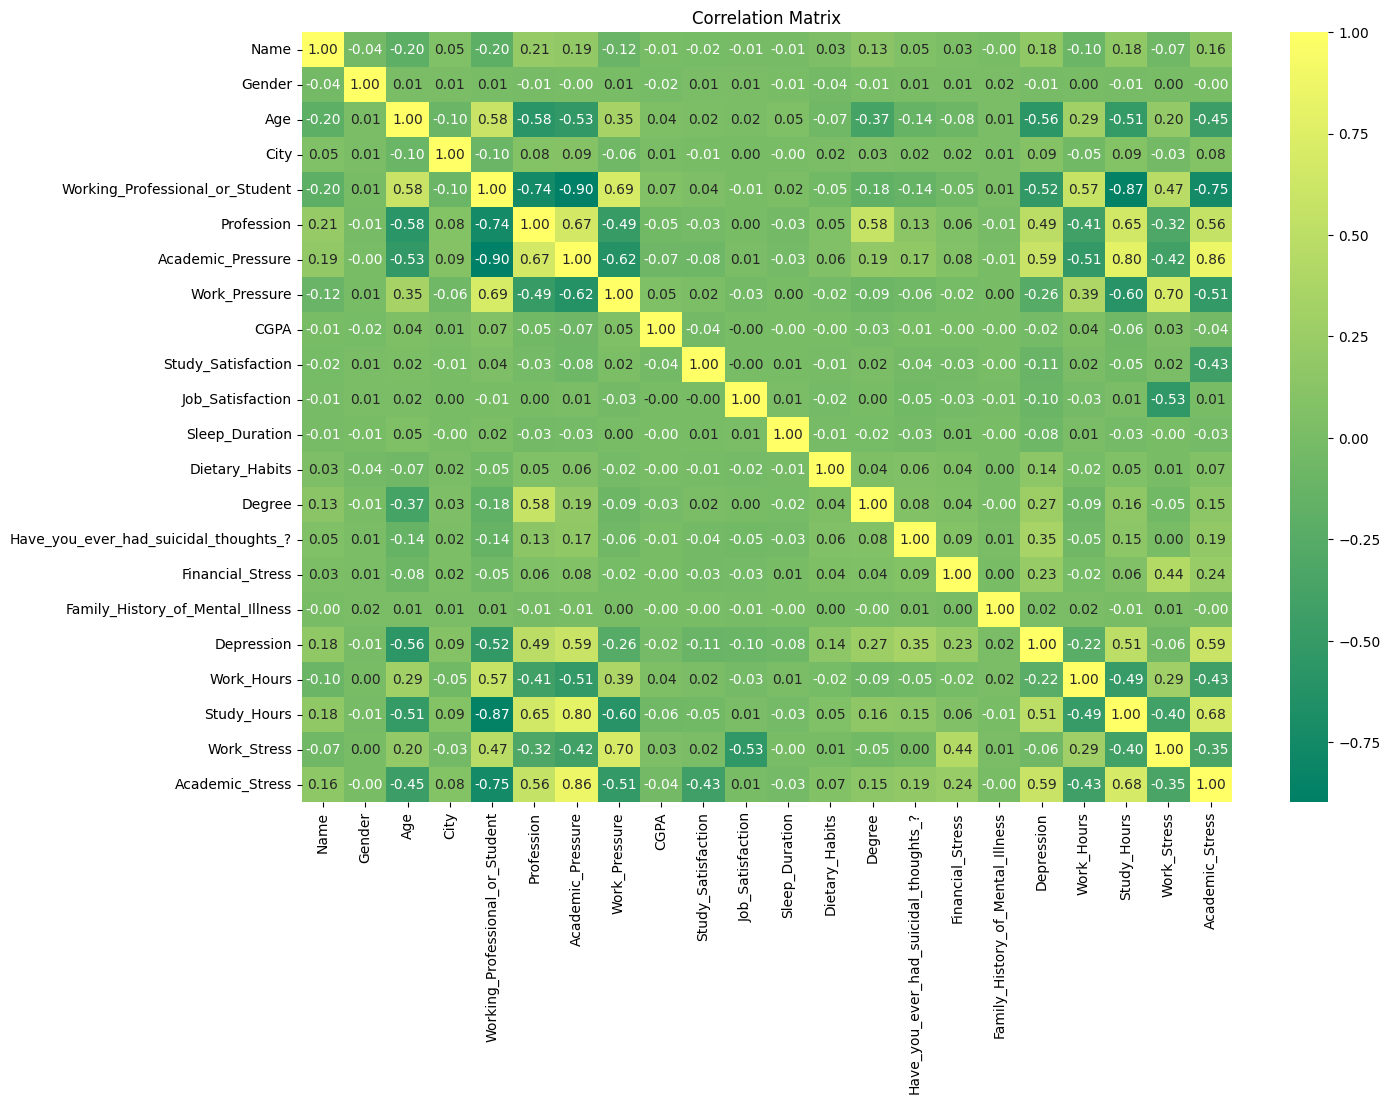

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cmap='summer',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import xgboost as xgb
import optuna
from sklearn.preprocessing import StandardScaler

In [33]:
y = train['Depression']
train = train.drop(['Depression'],axis=1)
X = train

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=607)

def objective(trial):
    colsample_bytree= trial.suggest_float('colsample_bytree',0,1)
    n_estimators = trial.suggest_int('n_estimators', 400,1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01,0.1)
    reg_lambda = trial.suggest_float('reg_lambda', 0,4)
    reg_alpha = trial.suggest_float('reg_alpha', 0,4)
    max_depth = trial.suggest_int('max_depth', 2,10)
    gamma = trial.suggest_float('gamma', 0,0.5)
    eval_metric='auc'
    
    model = XGBClassifier(
    colsample_bytree = colsample_bytree,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    reg_alpha=reg_alpha,
    reg_lambda=reg_lambda,
    gamma=gamma,
    eval_metric='auc',
    random_state=607
)
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return score

In [35]:
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.RandomSampler(seed=607))
optuna.logging.set_verbosity(optuna.logging.WARNING)

def log_best_trial(study, trial):
    if study.best_trial == trial:
        print(f"New best trial: {trial.number} with value: {trial.value} and params: {trial.params}")


study.optimize(objective, n_trials=100,callbacks=[log_best_trial])

[I 2024-11-12 18:41:56,824] A new study created in memory with name: no-name-7e94fe11-0af1-4799-ba70-c515681814b3


New best trial: 0 with value: 0.9737170186445515 and params: {'colsample_bytree': 0.9241441149445456, 'n_estimators': 480, 'learning_rate': 0.01934695515938726, 'reg_lambda': 0.995746986500277, 'reg_alpha': 0.7922495581786353, 'max_depth': 3, 'gamma': 0.00960148482380424}
New best trial: 1 with value: 0.974816975948096 and params: {'colsample_bytree': 0.1621141939217663, 'n_estimators': 866, 'learning_rate': 0.01830911692556304, 'reg_lambda': 2.9106714720433975, 'reg_alpha': 2.3081746881941307, 'max_depth': 8, 'gamma': 0.2014396057468147}
New best trial: 2 with value: 0.9751276947084168 and params: {'colsample_bytree': 0.8807953818921426, 'n_estimators': 412, 'learning_rate': 0.0758420999774204, 'reg_lambda': 0.7061383279618365, 'reg_alpha': 2.210813909235981, 'max_depth': 3, 'gamma': 0.36577013322844903}
New best trial: 3 with value: 0.9753510167470696 and params: {'colsample_bytree': 0.14492566230028125, 'n_estimators': 714, 'learning_rate': 0.0638419910172031, 'reg_lambda': 0.799541

In [36]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.6f}")

Best Hyperparameters: {'colsample_bytree': 0.288807006380292, 'n_estimators': 687, 'learning_rate': 0.07530305446753063, 'reg_lambda': 0.7430403624711, 'reg_alpha': 0.3037629135788351, 'max_depth': 4, 'gamma': 0.08745985967670639}
Best Accuracy: 0.975493


In [37]:
optuna.visualization.plot_param_importances(study)

In [38]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.6f}")

n_estimators = best_params['n_estimators']
reg_alpha = best_params['reg_alpha']
learning_rate = best_params['learning_rate']
reg_lambda = best_params['reg_lambda']
max_depth = best_params['max_depth']
colsample_bytree = best_params['colsample_bytree']
gamma = best_params['gamma']

Best Hyperparameters: {'colsample_bytree': 0.288807006380292, 'n_estimators': 687, 'learning_rate': 0.07530305446753063, 'reg_lambda': 0.7430403624711, 'reg_alpha': 0.3037629135788351, 'max_depth': 4, 'gamma': 0.08745985967670639}
Best Accuracy: 0.975493


In [39]:
best_xgb=XGBClassifier(
    colsample_bytree = colsample_bytree,
    n_estimators = n_estimators,
    learning_rate = learning_rate,
    reg_alpha = reg_alpha,
    reg_lambda = reg_lambda,
    max_depth = max_depth,
    gamma=gamma,
    eval_metric='auc',
    random_state=607
)

eval_set = [(X_train, y_train), (X_test, y_test)]

best_xgb.fit(X_train,y_train,eval_set=eval_set,verbose=False)

y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print(roc_auc)

accuracy: 0.9388
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23061
           1       0.85      0.81      0.83      5079

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140

0.9754930294828548


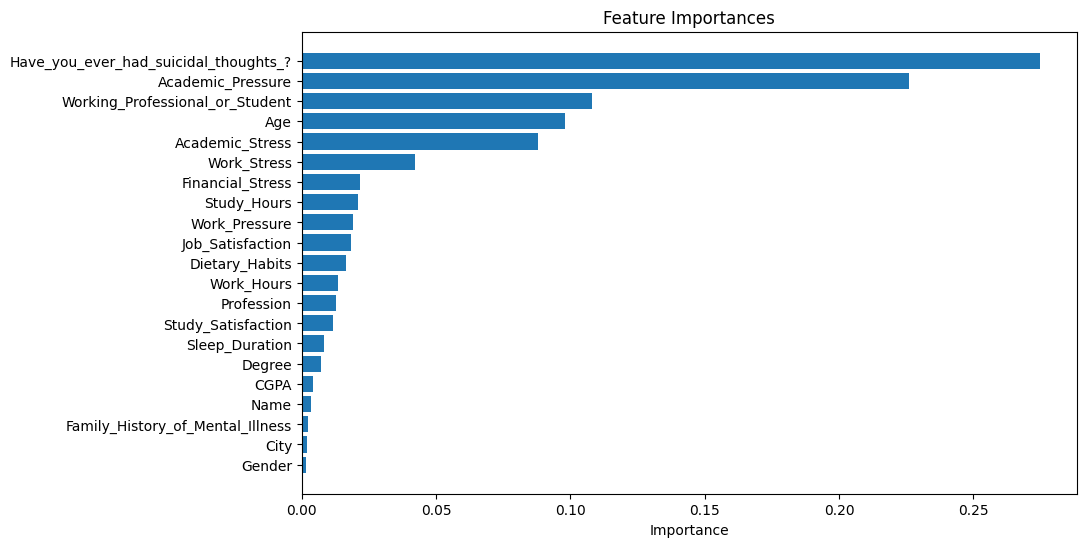

In [40]:
feature_importance = pd.DataFrame({
    'Feature': train.columns,
    'Importance': best_xgb.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

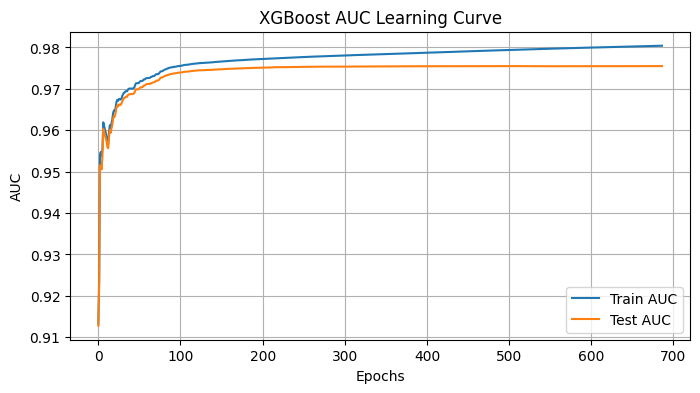

In [41]:
results = best_xgb.evals_result()

epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

plt.figure(figsize=(8,4))
plt.plot(x_axis, results['validation_0']['auc'], label='Train AUC')
plt.plot(x_axis, results['validation_1']['auc'], label='Test AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('XGBoost AUC Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
x_test_df = test[X_train.columns]

y_test_pred = best_xgb.predict(x_test_df)

test['predicted'] = y_test_pred

print(test[['predicted']])

       predicted
0              0
1              0
2              0
3              1
4              0
...          ...
93795          0
93796          1
93797          0
93798          1
93799          0

[93800 rows x 1 columns]


In [43]:
sub["id"]=id_col_test
sub["Depression"]=test['predicted']
sub.to_csv('submission.csv', index=False)
print(sub)
sub.info()

           id  Depression
0      140700           0
1      140701           0
2      140702           0
3      140703           1
4      140704           0
...       ...         ...
93795  234495           0
93796  234496           1
93797  234497           0
93798  234498           1
93799  234499           0

[93800 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          93800 non-null  int64
 1   Depression  93800 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
